In [79]:
import numpy as np
import matplotlib.pyplot as plt
#117.0274, 50.225


# Load data from file
data = np.loadtxt('sextractor/calib_red_30s.161.new.cat')

# Extract columns from the data
num = data[:,0]
x_pix = data[:, 1]
right_ascensions = data[:, 3]
decs = data[:, 4]
flux = data[:,5]

# Define masks for right ascensions and declinations
ra_mask = (right_ascensions < 117.029) & (right_ascensions > 117.026)
dec_mask = (decs < 50.234) & (decs > 50.219)

# Combine masks using logical AND
combined_mask = ra_mask & dec_mask

# Apply the combined mask to get the indices where the condition is True
indices = np.where(combined_mask)

# Extract the values based on the combined mask
filtered_x_pix = x_pix[indices]

# Print the filtered x_pix values
print(num[indices], filtered_x_pix)


[49.] [463.0496]


In [132]:
import os
import numpy as np

# Get a list of all files in the directory
file_list = os.listdir('sextractor')

# Filter and sort files numerically based on the number part before the extension
file_list = [file_name for file_name in file_list if file_name.startswith('calib_red_20s') and file_name.endswith('.cat')]
file_list.sort(key=lambda x: int(x.split('.')[-3].split('_')[-1]))

# Open the data file for writing
with open('data.dat', 'w') as f:
    # Iterate over each file in the directory
    for file_name in file_list:
        # Load data from file
        data = np.loadtxt(os.path.join('sextractor', file_name))

        # Extract columns from the data
        x_pix = data[:, 1]
        right_ascensions = data[:, 3]
        decs = data[:, 4]
        flux = data[:, 5]
        flux_err = data[:, 6]

        # Define masks for right ascensions and declinations
        ra_mask = (right_ascensions < 117.0285) & (right_ascensions > 117.0266)
        dec_mask = (decs < 50.227) & (decs > 50.223)

        # Combine masks using logical AND
        combined_mask = ra_mask & dec_mask

        # Apply the combined mask to get the indices where the condition is True
        indices = np.where(combined_mask)

        # Extract the values based on the combined mask
        xo_flux = flux[indices]
        xo_flux_err = flux_err[indices]

        # Stack flux and flux error horizontally
        stacked_data = np.column_stack((xo_flux, xo_flux_err))

        # Write the file name and the stacked data to the data file
        np.savetxt(f, stacked_data)


In [131]:
import os
import numpy as np

# Get a list of all files in the directory
file_list = os.listdir('sextractor')

# Filter and sort files numerically based on the number part before the extension
file_list = [file_name for file_name in file_list if file_name.startswith('calib_red_30s') and file_name.endswith('.cat')]
file_list.sort(key=lambda x: int(x.split('.')[-3].split('_')[-1]))

# Open the data file for writing
with open('data1.dat', 'w') as f:
    # Iterate over each file in the directory
    for file_name in file_list:
        # Load data from file
        data = np.loadtxt(os.path.join('sextractor', file_name))
        # Extract columns from the data
        x_pix = data[:, 1]
        right_ascensions = data[:, 3]
        decs = data[:, 4]
        flux = data[:, 5]
        flux_err = data[:, 6]

        # Define masks for right ascensions and declinations
        ra_mask = (right_ascensions < 117.029) & (right_ascensions > 117.0262)
        dec_mask = (decs < 50.23) & (decs > 50.220)

        # Combine masks using logical AND
        combined_mask = ra_mask & dec_mask

        # Apply the combined mask to get the indices where the condition is True
        indices = np.where(combined_mask)

        # Extract the values based on the combined mask
        xo_flux = flux[indices]
        xo_flux_err = flux_err[indices]

        print(file_name,xo_flux)
        # Stack flux and flux error horizontally
        stacked_data = np.column_stack((xo_flux, xo_flux_err))

        # Write the file name and the stacked data to the data file
        np.savetxt(f, stacked_data)


calib_red_30s.000.new.cat [0.8685131]
calib_red_30s.001.new.cat [1.016978]
calib_red_30s.002.new.cat [0.6649232 1.602662 ]
calib_red_30s.003.new.cat [2.494258]
calib_red_30s.004.new.cat [3.720633]
calib_red_30s.005.new.cat [1.515779  0.8117471]
calib_red_30s.006.new.cat [1.925402]
calib_red_30s.007.new.cat [0.3567239 0.567017 ]
calib_red_30s.008.new.cat [1.465918]
calib_red_30s.009.new.cat [0.6979077]
calib_red_30s.010.new.cat [0.2097061]
calib_red_30s.011.new.cat [1.143037]
calib_red_30s.012.new.cat [0.08899135 0.1219784 ]
calib_red_30s.013.new.cat [0.3176785]
calib_red_30s.015.new.cat [0.1552336]
calib_red_30s.016.new.cat [0.1725724]
calib_red_30s.017.new.cat [0.06333295]
calib_red_30s.020.new.cat [0.8539597]
calib_red_30s.021.new.cat [0.3880493]
calib_red_30s.022.new.cat [0.6230882]
calib_red_30s.023.new.cat [0.3041345]
calib_red_30s.024.new.cat [0.1494028]
calib_red_30s.025.new.cat [0.6143128]
calib_red_30s.028.new.cat [0.5057116]
calib_red_30s.029.new.cat [0.1934979]
calib_red_30s

Text(0.5, 1.0, 'XO-2N')

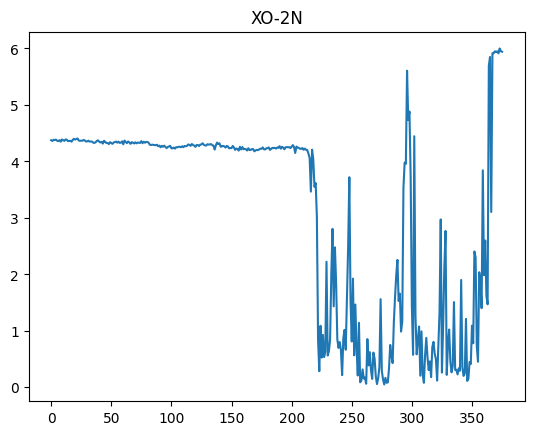

In [140]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('data.dat')

flux = data[:,0]

plt.plot(flux)
plt.title('XO-2N')